In [20]:
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff
# from samgeo.hq_sam import SamGeo, tms_to_geotiff


ImportError: cannot import name 'MousePosition' from 'ipyleaflet' (/opt/anaconda3/envs/geo_env/lib/python3.11/site-packages/ipyleaflet/__init__.py)

In [40]:
m = leafmap.Map(center=[37.6412, -122.1353], zoom=15, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[37.6412, -122.1353], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [31]:
if m.user_roi is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-122.1497, 37.6311, -122.1203, 37.6458]

In [32]:
image = "Image.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=16, source="Satellite", overwrite=True)

Image.tif [-122.1497, 37.6311, -122.1203, 37.6458] 16
Downloaded image 01/30
Downloaded image 02/30
Downloaded image 03/30
Downloaded image 04/30
Downloaded image 05/30
Downloaded image 06/30
Downloaded image 07/30
Downloaded image 08/30
Downloaded image 09/30
Downloaded image 10/30
Downloaded image 11/30
Downloaded image 12/30
Downloaded image 13/30
Downloaded image 14/30
Downloaded image 15/30
Downloaded image 16/30
Downloaded image 17/30
Downloaded image 18/30
Downloaded image 19/30
Downloaded image 20/30
Downloaded image 21/30
Downloaded image 22/30
Downloaded image 23/30
Downloaded image 24/30
Downloaded image 25/30
Downloaded image 26/30
Downloaded image 27/30
Downloaded image 28/30
Downloaded image 29/30
Downloaded image 30/30
Saving GeoTIFF. Please wait...
Image saved to Image.tif


In [56]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")


TypeError: No such trait: LayerGroup.visible

In [49]:
sam_manual = SamGeo(
    model_type="vit_b",  # can be vit_h, vit_b, vit_l, //vit_tiny
    automatic=False,
    sam_kwargs=None,
    device="cpu",
)

# change the model_type from vit_h to vit_b, so it take less space.

sam_auto = SamGeo(
    model_type="vit_b",
    device="cpu"
)

# Change device to "gpu" if gpu is available of the system.

In [50]:
sam_manual.set_image(image)


In [ ]:
point_coords = [[-122.1322820295899, 37.63426241475798]]
sam_manual.predict(point_coords, point_labels=1, point_crs="EPSG:4326", output="mask1.tif")


In [57]:
similar_masks = sam_auto.generate(
    source=image,
    similarity_threshold=0.99,  # did it work?
    template_mask="mask1.tif",
    output="similar_objects.tif"
)

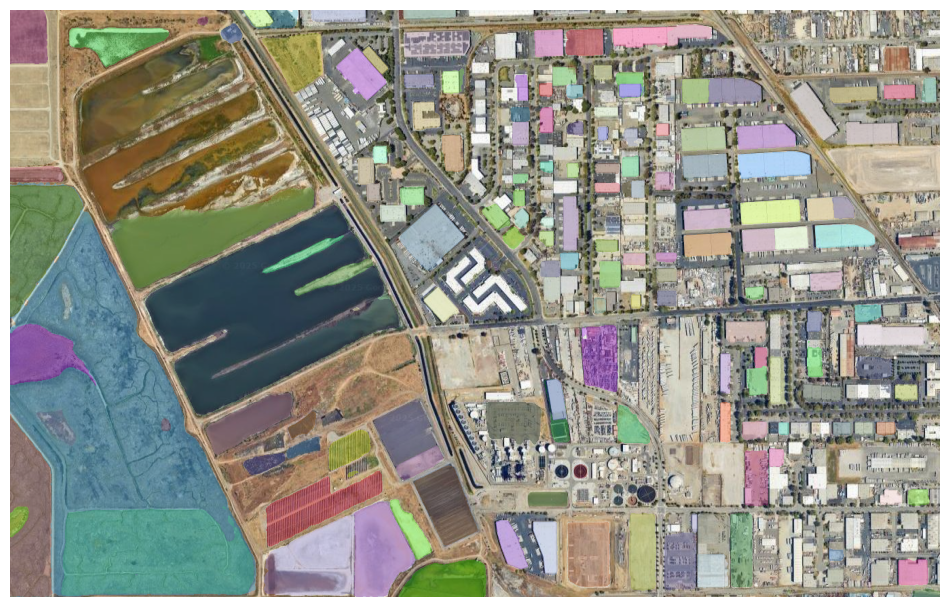

In [58]:
sam_auto.show_anns(
    cmap="Greens",
    box_color="red",
    title=f"Automatic Segmentation of similar objects",
    blend=True,
)